# Handwriting Recognition

All what follows can be read from: http://neuralnetworksanddeeplearning.com/chap1.html#complete_zero 

## A brief introduction to neural networks 

### Perceptrons 

One of the first artificial neurons were **perceptrons**.

They are the most simple type of neurons and they are just functions which take binary **inputs** $x_1, x_2, \dots$ and return a binary **output** $0$ or $1$. 

![Perceptron](./Images/perceptron.png)

The function which determines how the inputs interact can be written in terms of **weights** which determines the "importance" of each variable and a **threshold** which split the return into $0$ or $1$ depending the value of the weighted sum. Analytically, it is expressed as

\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}

or, equivalently, we can present the result in terms of the interior product $w \cdot x \equiv \sum_{i} w_i x_i$ and the **bias**, $b$, which is nothing but the opposite the threshold

\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } w \cdot x + b \leq 0 \\
      1 & \mbox{if } w \cdot x + b > 0
      \end{array} \right.
\tag{1}\end{eqnarray}

The greater the bias, the more easy is for a neuron to **fire**.

Presented in this way, perceptrons seem very useless objects. However, when combining a great number of them we can make complex computations

![Network of perceptrons](./Images/perceptrons_network.png)

In this case, each column is called a **layer** of the neural network. Layers which sit deeper in the neural network are capable of perform more complex tasks. 

Without further specifications, these neural networks are nothing new for computer computations. The new behaviour comes when introducing **learning algorithms** which set the value of the weights and bias for us to solve problems. 


### Sigmoid neurons 

If our task is to make that our neural network learns, then it would be more convenient to have something which, after a smooth change in the weights, it produces a smooth change in the output. This is clearly motivated for the fact that if we know that we are "close" to a particular result, we can perform small changes in the parameters to get closer and closer to the right result without producing undesireable jumps! Obviously this can not be achieved by perceptros, in which a small change in some $w_i$ could make the output jump from 0 to 1. What we need are **sigmoid neurons**.

Sigmoid neurons are very similar to perceptrons yet instead of returning $0$ or $1$, they can return any value between them. This is achieved by introducing a **sigmoid function** or **logistic function** before the output 
\begin{equation}
\text{output} = \sigma\left(w \cdot x + b\right) \quad , \quad \sigma(z) \equiv \frac{1}{1 + e^{-z}}
\end{equation}
The specific form of the function is not importat but its smooth (differentiable) behaviour, i.e. a differential change in $w$ and $b$ generates a diferential change in the output carried by $\partial_{w} \sigma$ and $\partial_b \sigma$ respectively. An important characteristic is that for $z \rightarrow \pm \infty$ it returns $1$ or $0$, respectively. Indeed, the sigmoid functions is just a particular case of what it is called **activation function** which in general has the job of modifying the output in a smooth way.

### Architecture of neural networks

Independetly of the type of neurons, we will consider following architecture for our network

![Network](./Images/neural_network.png)

The inputs and outputs themselves can be interpreted as **input layer** and **output layer**, respectively. Any layer between them is called **hidden layer**. These networks are called **MLP** which come from "multilayer perceptrons" even though the neurons inside could be other than perceptrons! In this particular architecture we are considering that the output of one layer is the input of the next one, these are called **feedforward** networks which means that there is no loops on it.

## How to recognize individual digits

We will concentrate in design a network which could recognize individual digits. To do so, we consider the following network

![digit recognition network](./Images/digit_recognition_network.png)

Since we will deal with images of $28 \times 28 = 784$ in grey-scale, we consider a $784$-dimensional imput layer in which each neuron contains one pixel which takes any value between $0$ and $1$ representing a value in the grey-scale. The output layer contains $10$ output neurons corresponding to the $10$ possible numbers. The maximum value between them will correspond to the correct digit. For instace, if the maximum number sits in the $6$th neuron, then we interpret that the network identified the input as the number $6$.

The previous architecture must be followed by a learning algorithm which teachs the machine how to solve the problem. The first ingredient to do so is a **training data** from which our algorithm will learn and a **test data** in which we are going to test our program. In this example we will use the [MINST data](http://yann.lecun.com/exdb/mnist/) set, which contains tens of thousands of scanned images of handwritten digits, together with their correct classifications. The following image is an example of the numbers in the set
![example MINST](./Images/example_MINST.png)

The data set is split into 60,000 images which serve as training data and 10.000 which are used as test data.

We will denote the $784$-dimensional training input as $x$, and the correct answer as the $10$-dimensional vector $y(x)$. We want to find appropiate wights and biases such that the output of our algorith, $a(w,b,x)$, approximates the real value $y$ in the best possible way. To quantify this, we introduce the **quadratic cost or loss function**

\begin{eqnarray}  C(w,b) \equiv
  \frac{1}{2n} \sum_x \| y(x) - a(w,b,x)\|^2.
\tag{6}\end{eqnarray}

which depends on the weights, biases and $n$, the total number of training inputs. The aim of our training algorithm is to minimize $C$ in terms of $w$ and $b$. We do this using a method called **gradient descent**. 

To see this method we consider a generic function $C(v)$ depending on some variables encoded in the vector $v$. A small variation in the variables will produce a small variation in the loss function carried by the gradient of the function in terms of $v$, i.e.
\begin{equation}
v \rightarrow v' = v + \Delta v \quad \Rightarrow \quad C \rightarrow C'(v')= C(v) + \Delta C(v) \quad , \quad \Delta C \eqsim \nabla_{v} C \cdot \Delta v
\end{equation}
If we want to minimize $C$, we can propose 
\begin{equation}
\Delta v = - \eta \nabla_v C
\end{equation}
where $\eta$ is a small, positive, parameter called the **learning rate**. This guaranties that $C$ always decrease upon this infinitesimal variation! Repeating this procedure, changing $v$ step by step, we expect to eventually reach a global minimum. The learning rate has to be taken small enough so that the variation equation remains a good aproximation but not too small in order not to make the algorithm too slow.

Going now to our particular case, we have $v = w + b$ and so we will move by the following increments
\begin{equation}\label{wbprime}
w_i' = w_i - \eta \frac{\partial C}{\partial w_i} \quad , \quad b_i' = b_i - \eta \frac{\partial C}{\partial b_i} 
\end{equation}

Even though this approach would do, when the trainning set is big, the learning procedure would take too much time to be usefull. This is because, if we look back at the loss function, it's easy to see that it is nothing but the average over all the training inputs $C = \frac{1}{n} \sum_{x} C_x$. Then, for every improvement of $w$ and $b$ we have to compute $\nabla C_x$ for each $x$ and then average it. For a great number of training inputs this procedure will be extremelly slow. A way to avoid this is by using a modification of the algorithm caled **stochastic gradient descent**. In this case, instead of computing $\nabla C_x$ for all $x$, the idea is to pick up some $m<< n$ random inputs among all the training inputs, let's say $X_1, \dots, X_m$ which is called a **mini-batch**. Provided we pick $m$ big enough, we expect that
\begin{eqnarray}
  \nabla C \approx \frac{1}{m} \sum_{j=1}^m \nabla C_{X_{j}},
\end{eqnarray}

In practice, the idea is to pick a random mini-batch, compute $\frac{\partial C}{\partial w_i}$ and $\frac{\partial C}{\partial b_i}$, and use them to train $w$ and $b$. Then, we pick up another random mini-batch and we repeat the process. This must be carried until exhausting all $n$ training inputs. After this, we say that we completed an **epoch of training** and we can begin a new one. 

In [3]:
## Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import os

#get the current directory

os.getcwdb()

b'/home/guybrush/Tomaco/Hobbies/Computacion_e_Informatica/AI/Deep learning/handwriting_recognition_program'

In [32]:
"""
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.
Gradients are calculated using backpropagation.
"""

class Network(object):

    def __init__(self, sizes):
        
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # asigns randomly the biases and weights to begin with. 
        
        #biases[i] is a vector containing the biases of the (i+1)-layer.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] 
        
        # weights[i] is a matrix containing the weights connecting the (i+1)-layer to the (i+2)-layer.
        # x is the number of neurons in the actual layer
        # y corresponds to the number of neurons in the next layer (outputs of the actual layer)
        # so weights[i-1][a-1][b-1] corresponds to a SINGLE random weight connecting the bth NEURON
        # of the ith LAYER to the ath NEURON of the next layer
        # for instance, weights[0][1][2] is a weight connecting the third NEURON (2) of the first LAYER (0)
        # to the second NEURON (1) of the second LAYER (0+1).
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] 
         
    def feedforward(self, a):
        
        """Return the output of the network if ``a`` is input."""
        
        # each one of these iterations compute the input of the next layer using a SIGMOID NEURON. 
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        if test_data: 
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data) 
            mini_batches = [ training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)] 
            # this is the important step. update_mini_batch changes the weight and biases of the network. 
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format( j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            
            # Invokes the backpropagation algorithm, which computs the gradient of the cost function 
            # for (x,y) data.
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            # sum the gradient of the cost function computed from (x,y) in mini_batch.
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)] 
            # At the end of the for loop, we have the sumatory of the gradient of the cost function 
            # on every element in the mini_batch.        
        # update the weights and biases
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)] 
        
    def backprop(self, x, y):
        
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        
        activation = x # the input
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        
        # This is just the feedforward function defined before but now storing the intermediate values, as z.  
        for b, w in zip(self.biases, self.weights):
            
            z = np.dot(w, activation)+b
            zs.append(z)
            
            # updates the activation, this is just the output of the current layer.
            activation = sigmoid(z)
            activations.append(activation)
            
        # backward pass
        
        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Pay attention to the variable l in the loop below.
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        
        return (output_activations-y)

#### Miscellaneous functions

def sigmoid(z):

    """The sigmoid function."""
    
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    
    """Derivative of the sigmoid function."""
    
    return sigmoid(z)*(1-sigmoid(z))

In [37]:
"""
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries

# Standard library
import _pickle as cPickle
import gzip

# Third-party libraries

import numpy as np

def load_data():
    
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('./MNIST-files.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = [(tri,trr) for tri, trr in zip(training_inputs, training_results)]
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = [(vai,vad) for vai, vad in zip(validation_inputs, va_d[1])]
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = [(tei,ted) for tei, ted in zip(test_inputs, te_d[1])]
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [34]:
# load the data in the wrapped-convenient way

training_data, validation_data, test_data = load_data_wrapper()

In [48]:
# create the neural network

net= Network([784,30,10])

In [49]:
# Train the NN
net.SGD(training_data, 30, 10, 3, test_data=test_data)

Epoch 0: 9048 / 10000
Epoch 1: 9207 / 10000
Epoch 2: 9293 / 10000
Epoch 3: 9356 / 10000
Epoch 4: 9358 / 10000
Epoch 5: 9425 / 10000
Epoch 6: 9412 / 10000
Epoch 7: 9423 / 10000
Epoch 8: 9408 / 10000
Epoch 9: 9435 / 10000
Epoch 10: 9484 / 10000
Epoch 11: 9486 / 10000
Epoch 12: 9493 / 10000
Epoch 13: 9499 / 10000
Epoch 14: 9497 / 10000
Epoch 15: 9514 / 10000
Epoch 16: 9485 / 10000
Epoch 17: 9457 / 10000
Epoch 18: 9500 / 10000
Epoch 19: 9511 / 10000
Epoch 20: 9505 / 10000
Epoch 21: 9496 / 10000
Epoch 22: 9516 / 10000
Epoch 23: 9496 / 10000
Epoch 24: 9541 / 10000
Epoch 25: 9519 / 10000
Epoch 26: 9510 / 10000
Epoch 27: 9508 / 10000
Epoch 28: 9513 / 10000
Epoch 29: 9509 / 10000


In [73]:
T= load_data()[0]
Tw= load_data_wrapper()[0]

def result_with_image(image_pos, show=True):
    
    """
    Return a tuple (X,Y) where X is the predicted number and Y is the real value.
    Then, it shows the number as a 28x28-pixel image.
    """
    
    pix=28
    I=np.zeros((pix,pix))
    
    # draws the number into a 28x28-pixel screen.
    for i in range(pix):
        fila=T[0][image_pos][pix*i:pix*(i+1)]
        I[i]= fila
        
    # the previous foor loop draws the numbers in white over a black background. This lines reverse those colors.
    InverseI= -I + np.array([[1]*pix]*pix)
    if show: plt.imshow(InverseI,cmap="gray")
    
    # Real number
    Y=T[1][image_pos] 
    
    # Builds the predicted number
    vector_result = net.feedforward(Tw[image_pos][0])
    X=np.where(vector_result == max(vector_result))[0][0] 
    
    return([X,Y])

[3, 3]

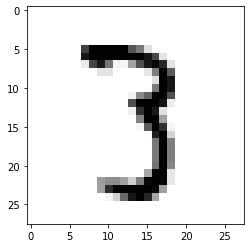

In [78]:
result_with_image(356)

In [72]:
total = 50000
goods = 50000
for i in range(total):
    A=result_with_image(i,False)
    if A[0] != A[1]: goods-=1
percentage = 100*goods/total
print(goods,percentage)

48397 96.794


In [9]:

"""
Converts and image to 1 and 0s
"""

from PIL import Image
from scipy.ndimage import zoom


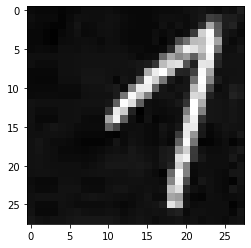

In [139]:

srcImage = Image.open("Einstein_numbers_1_rescaled.png") # Opens the image.
plt.imshow(arrayImage,cmap="gray") # Shows the image.
grayImage = srcImage.convert('L') # Converts it to gray scales.

# Transforms the image in numbers inside a matrix.
arrayImage = np.array(grayImage)

# Set the dimensions to 28x28 and normalizes to get a 0 to 1 scale diving with the maximum.
arrayImage = zoom(arrayImage, 28/28)/arrayImage.max()

# The append function transforms the 28x28 matrix into a single 784 array.
# The matrix function changes the object to a (1,784) matrix.
# The transpose matrix gives a (784,1) object,
arrayImage_list = np.transpose(np.matrix(np.append(arrayImage[0],arrayImage[1:]))) 

# rounds the number of decimals of the numbers
#arrayImage_list = np.round(arrayImage_list,decimals=5)

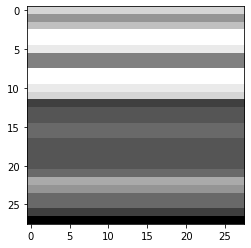

In [140]:
pix=28
I=np.zeros((pix,pix))

# draws the number into a 28x28-pixel screen.
for i in range(pix):
    fila=arrayImage_list[pix*i:pix*(i+1)][0]
    I[i]= fila

# the previous foor loop draws the numbers in white over a black background. This lines reverse those colors.
InverseI= -I + np.array([[1]*pix]*pix)
plt.imshow(InverseI,cmap="gray")

[[3.56043029e-04]
 [1.41035621e-08]
 [3.47416730e-12]
 [7.10543861e-01]
 [1.03606239e-04]
 [7.93392157e-01]
 [4.39612880e-11]
 [6.23674013e-03]
 [6.35322318e-08]
 [3.55388736e-05]]
5


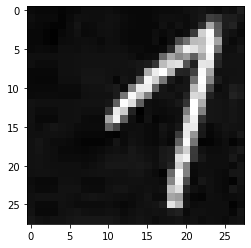

In [128]:
plt.imshow(arrayImage,cmap="gray")
predicted_result = net.feedforward(arrayImage_list)
print(predicted_result)
predicted_result=np.where(predicted_result == max(predicted_result))[0][0]
print(predicted_result)

In [117]:
wrapped_array = [np.reshape(x, (784, 1)) for x in array]
wrapped_array

NameError: name 'array' is not defined

784